In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
!ln -s ~/data/ data #symlink

In [31]:
data = pd.read_csv('data/pokemon/pokemon.csv')

## Basic python & Pandas

**some basic util functions**

In [18]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [20]:
data.memory_usage()

Index           80
#             6400
Name          6400
Type 1        6400
Type 2        6400
HP            6400
Attack        6400
Defense       6400
Sp. Atk       6400
Sp. Def       6400
Speed         6400
Generation    6400
Legendary      800
dtype: int64

In [21]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

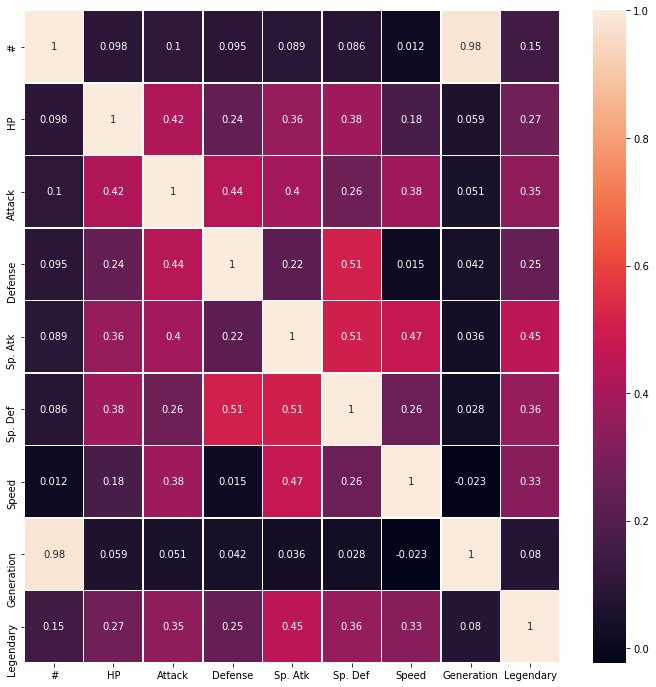

In [22]:
#correlation plot
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data.corr(),annot=True,linewidths=.5)

In [23]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [27]:
data.shape

(800, 12)

**Reading data into pandas dataframe efficiently and magic commands**

In [33]:
%%timeit #iterates multiple times and then give mean time taken
data1 = pd.read_csv('data/talking-data/train_sample.csv')

192 ms ± 4.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%time 
#one run
data1 = pd.read_csv('data/talking-data/train_sample.csv')

CPU times: user 167 ms, sys: 29.9 ms, total: 197 ms
Wall time: 196 ms


In [44]:
%time
# % is line magic and %% is cell magic
data1 = pd.read_csv('data/talking-data/train_sample.csv')
data1.head()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [54]:
%%timeit 
#one run
data1 = pd.read_csv('data/talking-data/train_sample.csv')

193 ms ± 2.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
data1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null uint32
app                100000 non-null uint16
device             100000 non-null uint16
os                 100000 non-null uint16
channel            100000 non-null uint16
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null uint8
dtypes: object(2), uint16(4), uint32(1), uint8(1)
memory usage: 2.8+ MB


Defining dtypes beforehand greatly decreases the storage

In [56]:
%%timeit
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }
data1 = pd.read_csv('data/talking-data/train_sample.csv',dtype=dtypes)

187 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
data1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null uint32
app                100000 non-null uint16
device             100000 non-null uint16
os                 100000 non-null uint16
channel            100000 non-null uint16
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null uint8
dtypes: object(2), uint16(4), uint32(1), uint8(1)
memory usage: 2.8+ MB


You can choose which rows to load

In [65]:
data1 = pd.read_csv('data/talking-data/train_sample.csv',dtype=dtypes,nrows=100)

In [66]:
data1.shape

(100, 8)

In [67]:
data1.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
95,2600,12,1,18,265,2017-11-07 19:16:25,NaN,0
96,99926,12,1,13,245,2017-11-06 18:06:05,NaN,0
97,114878,2,2,9,477,2017-11-07 02:35:23,NaN,0
98,173847,3,1,13,452,2017-11-08 14:57:14,NaN,0
99,145747,12,1,13,178,2017-11-07 13:54:07,NaN,0


You can skip rows

In [68]:
data1 = pd.read_csv('data/talking-data/train_sample.csv',dtype=dtypes,nrows=100,skiprows=99)

In [69]:
data1.head()

,173847,3,1,13,452,2017-11-08 14:57:14,Unnamed: 6,0
0,145747,12,1,13,178,2017-11-07 13:54:07,NaN,0
1,94081,9,1,18,445,2017-11-09 02:52:27,NaN,0
2,74725,9,1,13,334,2017-11-08 10:55:35,NaN,0
3,51895,18,1,17,107,2017-11-09 07:26:02,NaN,0
4,75431,9,1,13,334,2017-11-08 11:34:40,NaN,0


see the last and the first row is matching

In [70]:
data1 = pd.read_csv('data/talking-data/train_sample.csv',dtype=dtypes,nrows=100,skiprows=range(1,100))

In [71]:
data1.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,145747,12,1,13,178,2017-11-07 13:54:07,NaN,0
1,94081,9,1,18,445,2017-11-09 02:52:27,NaN,0
2,74725,9,1,13,334,2017-11-08 10:55:35,NaN,0
3,51895,18,1,17,107,2017-11-09 07:26:02,NaN,0
4,75431,9,1,13,334,2017-11-08 11:34:40,NaN,0


You can skip specific rows

In [72]:
data1 = pd.read_csv('data/talking-data/train_sample.csv',dtype=dtypes,nrows=100,skiprows=[1,3,5])

In [73]:
data1.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
1,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
2,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
3,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
4,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0


**Series vs dataframe**

In [156]:
data['Name'][0:4] #pandas series

0        Bulbasaur
1          Ivysaur
2         Venusaur
3    Mega Venusaur
Name: Name, dtype: object

In [155]:
data[['Name']][0:4] #pandas dataframe

,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Mega Venusaur


**Filtering pandas dataframe**

In [74]:
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


Iterating in for loops

In [75]:
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

spain  :  madrid
france  :  paris



In [154]:
for i,d in data[['Defense']][0:10].iterrows():
    print(i,d)

0 Defense    49
Name: 0, dtype: int64
1 Defense    63
Name: 1, dtype: int64
2 Defense    83
Name: 2, dtype: int64
3 Defense    123
Name: 3, dtype: int64
4 Defense    43
Name: 4, dtype: int64
5 Defense    58
Name: 5, dtype: int64
6 Defense    78
Name: 6, dtype: int64
7 Defense    111
Name: 7, dtype: int64
8 Defense    78
Name: 8, dtype: int64
9 Defense    65
Name: 9, dtype: int64


Scoping : There is a LEGB rule that is search local scope, enclosing function, global and built in scopes, respectively.

In [96]:
x = 5
def f():
    y = 2*x        # there is no local scope x
    return y
print(f())
print(x)

10
5


**Default and flexible arguments: args vs kwargs**

Whatever is passed in args is taken as tuple

In [100]:
# flexible arguments *args
def f(*args):
    print(type(args))
    print(args[0])
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)
f([1,2,3])

<class 'tuple'>
1
1

<class 'tuple'>
1
1
2
3
4
<class 'tuple'>
[1, 2, 3]
[1, 2, 3]


Whatver is passed in kwargs is considered as dictionary

In [102]:
def f(**kwargs):
    print(type(kwargs))
    """ print key and value of dictionary"""
    for key, value in kwargs.items():               # If you do not understand this part turn for loop part and look at dictionary in for loop
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

<class 'dict'>
country   spain
capital   madrid
population   123456


You can pass args and kwargs simultaneously

In [103]:
def show_details(a,b,*args,**kwargs):
  print("a is ",a)
  print("b is ",b)
  print("args is ",args)
  print("kwargs is ",kwargs)
show_details(1,2,3,4,5,6,7,8,9)
print("-----------")
show_details(1,2,3,4,5,6,c= 7,d = 8,e = 9)
print("-----------")

a is  1
b is  2
args is  (3, 4, 5, 6, 7, 8, 9)
kwargs is  {}
-----------
a is  1
b is  2
args is  (3, 4, 5, 6)
kwargs is  {'c': 7, 'd': 8, 'e': 9}
-----------


In [104]:
def sum(a,b):
    return a+b

In [105]:
sum(1,2)

3

In [106]:
num = [1,2]
sum(*num)

3

In [111]:
num = {"a":1,"b":2} #keys shouls match with function parameter
sum(**num)

3

**Lambda function**

In [112]:
square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

16
6


map applies lambda function to each element of list

In [118]:
a = [1,2,3]
print(list(map(lambda x: x+2, a)))

[3, 4, 5]


**Iterators**

works with list, dictionaries and any other iterable

In [119]:
a  = [1,2,3]

In [131]:
it = iter(a)

In [132]:
next(it)

1

In [133]:
print(*it) #print remaining iterations

2 3


In [134]:
a  = "abcdef"

In [135]:
it = iter(a)

In [136]:
next(it)

'a'

In [137]:
print(*it) #print remaining iterations

b c d e f


In [142]:
a  = {"a":1,"B":3,"c":3}

In [143]:
it = iter(a.values())

In [144]:
next(it)

1

In [145]:
print(*it) #print remaining iterations

3 3


In [146]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


**List comprehension for pandas**

In [147]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [150]:
for i in data.Speed[0:4]: print(i)

45
60
80
80


In [153]:
data['speed2'] = [i>60 for i in data.Speed] #use of list comprehension

In [152]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed2
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,True
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,True


**Cleaning data**

counting number of rows for each value

In [161]:
data['Type 1'].value_counts() #works with series data

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [164]:
# if there are nan values that also be counted
data['Type 1'].value_counts(dropna=False) #works with series data

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [165]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


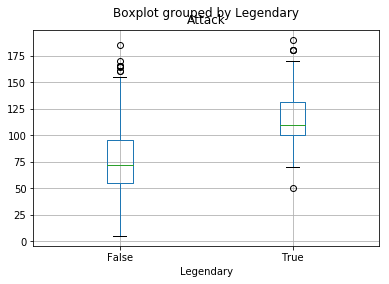

In [166]:
data.boxplot(column='Attack',by = 'Legendary')

**Tidy data: wide to long**

In [167]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed2
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,True
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,True


In [175]:
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(data,id_vars='Name',value_vars=['Attack','Defense'],var_name='type',value_name='value')

In [176]:
melted.head()

,Name,type,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52


reverse of melting

In [182]:
melted.pivot(index = 'Name', columns = 'type',values='value')

type,Attack,Defense
Name,,
NaN,105,60
Abomasnow,92,75
Abra,20,15
Absol,130,60
Accelgor,70,40
Aegislash Blade Forme,150,50
Aegislash Shield Forme,50,150
Aerodactyl,105,65
Aggron,110,180


**Concatenating df**

In [183]:
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) #stack by rows

In [184]:
conc_data_row.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed2
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,True
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,True


In [185]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : stack by columns
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


**typecasting**

In [186]:
data['Type 1'] = data['Type 1'].astype('category')

In [187]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary         bool
speed2            bool
dtype: object

**missing value treatment**

In [190]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
speed2          0
dtype: int64

In [205]:
data2 = data.copy()

In [206]:
data2.shape

(800, 13)

In [209]:
data2.dropna(inplace=True) #removes the rows

In [210]:
data2.shape

(414, 13)

In [211]:
assert(data2['Type 2'].notnull().all() == 1)

In [212]:
data2 = data.copy()

In [213]:
data2['Type 2'].fillna('empty',inplace=True) #replace with empty

In [214]:
assert(data2['Type 2'].notnull().all() == 1)

In [215]:
data2.shape

(800, 13)

In [216]:
data2['Type 2'].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Ice          14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

pandas to numpy

In [217]:
data.values

array([[1, 'Bulbasaur', 'Grass', ..., 1, False, False],
       [2, 'Ivysaur', 'Grass', ..., 1, False, False],
       [3, 'Venusaur', 'Grass', ..., 1, False, True],
       ...,
       [798, 'Hoopa Confined', 'Psychic', ..., 6, True, True],
       [799, 'Hoopa Unbound', 'Psychic', ..., 6, True, True],
       [800, 'Volcanion', 'Fire', ..., 6, True, True]], dtype=object)

**Indexing time series**

In [218]:
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

/Users/Shikhar/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed2
date,,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,True
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,True


In [221]:
print(data2.loc["1992-03-10":"1993-03-16"])

            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  speed2  
date                                                       
1992-03-10      100     80           1      False    True  
1993-03-15      120     80           1      False    True  
1993-03-16       50     65           1      False    True  


**data manipuation**

In [223]:
data = pd.read_csv('data/pokemon/pokemon.csv')
data= data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [224]:
data["HP"][1]

45

In [225]:
data.HP[1]

45

In [226]:
data.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [228]:
data[["HP","Attack"]][:3]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82


In [229]:
data.index.name

'#'

**Setting multi-level indices**

In [234]:
data = pd.read_csv('data/pokemon/pokemon.csv')

In [241]:
data1 = data.set_index(["Type 1","Legendary"]) 

Other important index related functions: swaplevel, unstack

**Group by**

In [249]:
data.head(4)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False


In [250]:
data.groupby('Type 1').mean() #it skipped categorical columns

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,369.072464,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,508.387097,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,522.843750,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,401.590909,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,495.529412,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,401.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,361.942308,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,747.500000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,537.281250,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [254]:
data.groupby('Type 1')['Attack','HP'].mean() #you can choose multiple columns also

,Attack,HP
Type 1,,
Bug,70.971014,56.884058
Dark,88.387097,66.806452
Dragon,112.125000,83.312500
Electric,69.090909,59.795455
Fairy,61.529412,74.117647
Fighting,96.777778,69.851852
Fire,84.769231,69.903846
Flying,78.750000,70.750000
Ghost,73.781250,64.437500


## Numpy

**creating arrays**

1-d

In [256]:
l = [1,2,3]

In [258]:
a = np.array(l)

vectorized operations can only happen with arrays and not list

In [266]:
a.shape

(3,)

In [267]:
a

array([1, 2, 3])

In [259]:
a+2

array([3, 4, 5])

In [261]:
l+2

TypeError: can only concatenate list (not "int") to list

2-d

In [272]:
a2 = np.array([[1,2],[3,4]])

In [273]:
a2.shape

(2, 2)

In [274]:
a2

array([[1, 2],
       [3, 4]])

In [275]:
a2.shape

(2, 2)

 Some of the most commonly used numpy dtypes are: `float`, `int`, `bool`, `str` and `object`.

In [277]:
np.array([[1,2],[3,4]],dtype='float')

array([[1., 2.],
       [3., 4.]])

you can type cast

In [278]:
a2.astype('float')

array([[1., 2.],
       [3., 4.]])

Array should have same datatype which is not the case in list

In [276]:
np.array([[1,2,3],[3,4]]) #due to different numbers in the list, it took the complete list as one element

array([list([1, 2, 3]), list([3, 4])], dtype=object)

In [279]:
arr1d_obj = np.array([1, 'a'], dtype='object')

In [280]:
arr1d_obj.shape

(2,)

In [281]:
arr1d_obj

array([1, 'a'], dtype=object)

In [291]:
arr1d_obj.size

2

In [282]:
a2.tolist()

[[1, 2], [3, 4]]

In [283]:
arr1d_obj.tolist()

[1, 'a']

Arrays support vectorised operations, while lists don’t.
Once an array is created, you cannot change its size. You will have to create a new array or overwrite the existing one.
Every array has one and only one dtype. All items in it should be of that dtype.
An equivalent numpy array occupies much less space than a python list of lists.

In [284]:
list2 = [[1, 2, 3, 4],[3, 4, 5, 6], [5, 6, 7, 8]]
arr2 = np.array(list2, dtype='float')
arr2


array([[1., 2., 3., 4.],
       [3., 4., 5., 6.],
       [5., 6., 7., 8.]])

In [285]:
arr2.shape

(3, 4)

In [290]:
arr2.size #gives number of elements

12

In [288]:
arr2.ndim

2

In [289]:
arr2.dtype

dtype('float64')

**Indexing into arrays**

In [292]:
arr2[:2,:1] #indexing starts at 0

array([[1.],
       [3.]])

In [293]:
arr2>4

array([[False, False, False, False],
       [False, False,  True,  True],
       [ True,  True,  True,  True]])

In [295]:
arr2[arr2>4]#boolean indexing can be passed but it'll flatten the output

(6,)

Reversing the array

In [3]:
list2 = [[1, 2, 3, 4],[3, 4, 5, 6], [5, 6, 7, 8]]
arr2 = np.array(list2, dtype='float')
arr2

array([[1., 2., 3., 4.],
       [3., 4., 5., 6.],
       [5., 6., 7., 8.]])

In [5]:
arr2[::-1] #row reversal

array([[5., 6., 7., 8.],
       [3., 4., 5., 6.],
       [1., 2., 3., 4.]])

In [6]:
arr2[::-1,::-1] #row and column reversal

array([[8., 7., 6., 5.],
       [6., 5., 4., 3.],
       [4., 3., 2., 1.]])

missing and infintie value

In [7]:
arr2[1,1] = np.NaN

In [8]:
arr2[1,2] = np.inf

In [11]:
arr2

array([[ 1.,  2.,  3.,  4.],
       [ 3., nan, inf,  6.],
       [ 5.,  6.,  7.,  8.]])

In [9]:
np.isnan(arr2)

array([[False, False, False, False],
       [False,  True, False, False],
       [False, False, False, False]])

In [10]:
np.isinf(arr2)

array([[False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False]])

In [14]:
arr2[np.isnan(arr2) | np.isinf(arr2)] = -1

In [15]:
arr2

array([[ 1.,  2.,  3.,  4.],
       [ 3., -1., -1.,  6.],
       [ 5.,  6.,  7.,  8.]])

computing mean, min and max

In [18]:
arr2.mean(axis=0) #across rows

array([3.        , 2.33333333, 3.        , 6.        ])

In [20]:
arr2.max(axis=1) #across columns

array([4., 6., 8.])

In [25]:
np.cumsum(arr2)

array([ 1.,  3.,  6., 10., 13., 12., 11., 17., 22., 28., 35., 43.])

In [26]:
np.cumsum(arr2,axis=0)

array([[ 1.,  2.,  3.,  4.],
       [ 4.,  1.,  2., 10.],
       [ 9.,  7.,  9., 18.]])

If you just assign a portion of an array to another array, the new array you just created actually refers to the parent array in memory.

That means, if you make any changes to the new array, it will reflect in the parent array as well.

So to avoid disturbing the parent array, you need to make a copy of it using copy(). All numpy arrays come with the copy() method.

**Reshaping**

In [28]:
arr2.shape

(3, 4)

In [30]:
arr2

array([[ 1.,  2.,  3.,  4.],
       [ 3., -1., -1.,  6.],
       [ 5.,  6.,  7.,  8.]])

In [29]:
arr2.reshape(4,3)

array([[ 1.,  2.,  3.],
       [ 4.,  3., -1.],
       [-1.,  6.,  5.],
       [ 6.,  7.,  8.]])

In [31]:
arr2.T

array([[ 1.,  3.,  5.],
       [ 2., -1.,  6.],
       [ 3., -1.,  7.],
       [ 4.,  6.,  8.]])

Rememeber that reshape and transpose both are different

flatten vs ravel: The difference between ravel and flatten is, the new array created using ravel is actually a reference to the parent array. So, any changes to the new array will affect the parent as well. But is memory efficient since it does not create a copy.

In [33]:
a3 = arr2.flatten()

In [35]:
a3[1] =100

In [36]:
a3

array([  1., 100.,   3.,   4.,   3.,  -1.,  -1.,   6.,   5.,   6.,   7.,
         8.])

In [37]:
arr2

array([[ 1.,  2.,  3.,  4.],
       [ 3., -1., -1.,  6.],
       [ 5.,  6.,  7.,  8.]])

In [38]:
a3 = arr2.ravel()

In [39]:
a3[1] =100

In [40]:
a3

array([  1., 100.,   3.,   4.,   3.,  -1.,  -1.,   6.,   5.,   6.,   7.,
         8.])

In [41]:
arr2

array([[  1., 100.,   3.,   4.],
       [  3.,  -1.,  -1.,   6.],
       [  5.,   6.,   7.,   8.]])

**creating sequences**

In [42]:
np.arange(4)

array([0, 1, 2, 3])

In [43]:
np.arange(3,8)

array([3, 4, 5, 6, 7])

In [47]:
np.arange(3,30,2) #step size

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [50]:
np.arange(30,3,-2) #reverse order

array([30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10,  8,  6,  4])

If you dont want to calculate step size

In [51]:
np.linspace(0,100,num=4)

array([  0.        ,  33.33333333,  66.66666667, 100.        ])

In [52]:
np.linspace(0,100,num=4,dtype='int')

array([  0,  33,  66, 100])

in log space

In [53]:
np.logspace(0,3,num=3)

array([   1.       ,   31.6227766, 1000.       ])

In [54]:
np.zeros([1,3])

array([[0., 0., 0.]])

In [55]:
np.ones([1,3])

array([[1., 1., 1.]])

repeating sequences

In [56]:
a = [1,2,3]

In [58]:
np.tile(a,2)

array([1, 2, 3, 1, 2, 3])

In [59]:
np.repeat(a,3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

**Generating random numbers**

In [61]:
np.random.rand(2,2) #creating random array of given shape and values between 0,1 uniform distibution

array([[0.97373593, 0.37347411],
       [0.68373929, 0.51986594]])

In [62]:
np.random.randn(2,2) #numbers picked from normal distribution of mean 0 and variance 1 of given shape

array([[ 0.6446893 ,  1.91141864],
       [ 0.75216223, -0.86452048]])

In [63]:
np.random.randint(0,10,[2,2])

array([[4, 1],
       [1, 5]])

In [66]:
np.random.random([2,2])

array([[0.89315535, 0.75531404],
       [0.63022736, 0.14808   ]])

In [67]:
np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10)

array(['a', 'e', 'i', 'a', 'i', 'o', 'u', 'a', 'a', 'e'], dtype='<U1')

In [68]:
np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, .1, 0.1, 0.4, 0.1])

array(['u', 'e', 'o', 'o', 'o', 'o', 'o', 'i', 'o', 'o'], dtype='<U1')

In [82]:
rn = np.random.RandomState(100)
rn.rand(2,2),rn.rand(3,3)

(array([[0.54340494, 0.27836939],
        [0.42451759, 0.84477613]]),
 array([[0.00471886, 0.12156912, 0.67074908],
        [0.82585276, 0.13670659, 0.57509333],
        [0.89132195, 0.20920212, 0.18532822]]))

In [73]:
np.random.seed(100)

array([[0.13670659, 0.57509333],
       [0.89132195, 0.20920212]])

In [83]:
a = np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10)

In [84]:
np.unique(a,return_counts=True) #getting unique items

(array(['i', 'o', 'u'], dtype='<U1'), array([4, 4, 2]))

### Advanced numpy

filtering

In [85]:
arr_rand = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])

In [87]:
pos =np.where(arr_rand>5)

In [91]:
arr_rand[pos].shape

(4,)

In [90]:
np.take(arr_rand,pos).shape

(1, 4)

In [92]:
np.where(arr_rand>5,"a","b")

array(['a', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b'], dtype='<U1')

In [94]:
list2 = [[1, 2, 3, 4],[3, 4, 5, 6], [5, 6, 7, 8]]
arr2 = np.array(list2, dtype='float')

In [97]:
np.argmax(arr2,axis=1)

array([3, 3, 3])

Stacking

In [98]:
arr3 = np.ones([3,4])

In [99]:
arr3

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [101]:
np.concatenate((arr2,arr3),axis =1)

array([[1., 2., 3., 4., 1., 1., 1., 1.],
       [3., 4., 5., 6., 1., 1., 1., 1.],
       [5., 6., 7., 8., 1., 1., 1., 1.]])

In [102]:
arr4 = np.ones([3,4,5])

In [103]:
arr5 = np.zeros([3,4,5])

In [106]:
np.concatenate((arr4,arr5),axis = 2)

array([[[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]],

       [[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]],

       [[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]]])

In [107]:
np.concatenate((arr4,arr5),axis = 1)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [108]:
np.concatenate((arr4,arr5),axis = 0)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

sorting

In [109]:
x = np.array([1, 10, 5, 2, 8, 9])
sort_index = np.argsort(x)
print(sort_index)

[0 3 2 4 5 1]


In [111]:
sorted_index_1stcol = arr2[:, 0].argsort()

# Sort 'arr' by first column without disturbing the integrity of rows
arr2[sorted_index_1stcol]

array([[1., 2., 3., 4.],
       [3., 4., 5., 6.],
       [5., 6., 7., 8.]])

In [113]:
# Descending sort
arr2[sorted_index_1stcol[::-1]]

array([[5., 6., 7., 8.],
       [3., 4., 5., 6.],
       [1., 2., 3., 4.]])

In [115]:
lexsorted_index = np.lexsort((arr2[:, 1], arr2[:, 0])) 
arr2[lexsorted_index]

array([[1., 2., 3., 4.],
       [3., 4., 5., 6.],
       [5., 6., 7., 8.]])

vectorize

In [116]:
def foo(x):
    if x % 2 == 1:
        return x**2
    else:
        return x/2

In [118]:
a = np.array([1,2,3])

In [120]:
foo_vect = np.vectorize(foo)

In [121]:
foo_vect(a)

array([1, 1, 9])

introducing a new axis

In [122]:
x = np.arange(5)

In [123]:
x

array([0, 1, 2, 3, 4])

In [124]:
x[:,np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [125]:
x[np.newaxis,:]

array([[0, 1, 2, 3, 4]])

In [127]:
x[np.newaxis,:,np.newaxis].shape

(1, 5, 1)

In [128]:
np.clip(x, 3, 8) #clipping

array([3, 3, 3, 3, 4])

## Regular expressions

https://www.machinelearningplus.com/python/python-regex-tutorial-examples/

In [129]:
import re

A regex pattern is a special language used to represent generic text, numbers or symbols so it can be used to extract texts that conform to that pattern.

Here the '\s' matches any whitespace character. By adding a '+' notation at the end will make the pattern match at least 1 or more spaces. So, this pattern will match even tab '\t' characters as well.

In [130]:
regex = re.compile('\s+')

**Splitting a string using regex**

In [131]:
text = "Hello World.   Regex is awesome"

In [132]:
regex.split(text)

['Hello', 'World.', 'Regex', 'is', 'awesome']

Another way but regex is generally the better one

In [133]:
re.split('\s',text)

['Hello', 'World.', '', '', 'Regex', 'is', 'awesome']

**re.findall**

the findall method extracts all occurrences of the pattern

 `'\d'` is a regular expression which matches any digit

In [134]:
text = "101 howard street, 246 mcallister street"

In [135]:
regex_num = re.compile('\d+')

In [136]:
regex_num.findall(text)

['101', '246']

In [137]:
regex_num.split(text)

['', ' howard street, ', ' mcallister street']

**re.search() vs re.match()**

`regex.search()` returns a particular match object that contains the starting and ending positions of the **first occurrence of the pattern**.

Likewise, `regex.match()` also returns a match object. But the difference is, it requires the pattern to be present at the **beginning of the text itself**.

In [139]:
text2 = "205 MAT   Mathematics 189"

In [141]:
m = regex_num.match(text2)

In [142]:
m.group()

'205'

In [143]:
m.start()

0

In [144]:
s = regex_num.search(text2)

In [145]:
s.group()

'205'

**Substituting one text by another using `regex.sub()`**

In [146]:
text = """101   COM \t  Computers
205   MAT \t  Mathematics
189   ENG  \t  English"""

In [147]:
regex = re.compile('\s+')

In [148]:
regex.sub(' ',text)

'101 COM Computers 205 MAT Mathematics 189 ENG English'

In [149]:
# get rid of all extra spaces except newline
regex = re.compile('((?!\n)\s+)')
print(regex.sub(' ', text))

101 COM Computers
205 MAT Mathematics
189 ENG English


**combining regex pattern**

In [150]:
# define the course text pattern groups and extract
course_pattern = '([0-9]+)\s*([A-Z]{3})\s*([A-Za-z]{4,})'
re.findall(course_pattern, text)

[('101', 'COM', 'Computers'),
 ('205', 'MAT', 'Mathematics'),
 ('189', 'ENG', 'English')]

**greedy regex**

In [152]:
text = "< body>Regex Greedy Matching Example < /body>"
re.findall('<.*>', text)

['< body>Regex Greedy Matching Example < /body>']

it should have stopped at first > but it didn't. For extracting only the smaller portions:

In [153]:
re.findall('<.*?>', text)

['< body>', '< /body>']

In [155]:
s = re.search('<.*?>', text) #getting only the first one

In [156]:
s.group()

'< body>'

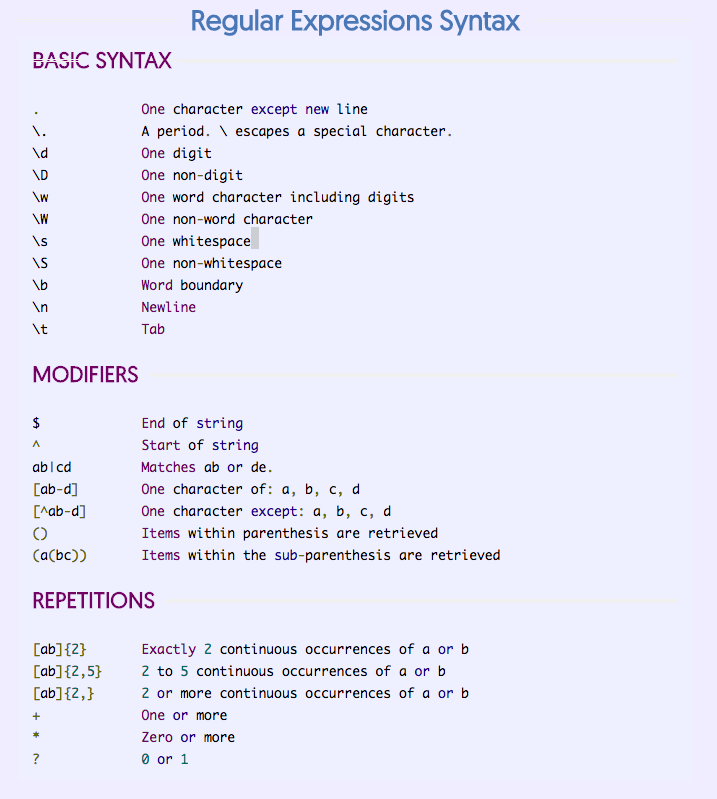

In [157]:
text = '01, Jan 2015'

In [159]:
print(re.findall('\d{3}', text))

['201']


**matching word boundaries**

In [160]:
re.findall(r'\btoy\b', 'play toy broke toys')

['toy']

In [161]:
re.findall(r'\btoy', 'play toy broke toys')

['toy', 'toy']

In [162]:
re.findall(r'toy\b', 'play toy broke toys')

['toy']

In [163]:
re.findall(r'\Btoy\b', 'playtoy broke toys')

['toy']

In [164]:
re.findall(r'\Btoy\B', 'playtoybroke toys')

['toy']

In [166]:
re.findall(r'\btoy', 'playtoybroke toys')

['toy']

#### Practice regex examples

In [167]:
emails = """zuck26@facebook.com
page33@google.com
jeff42@amazon.com"""

desired_output = [('zuck26', 'facebook', 'com'),
 ('page33', 'google', 'com'),
 ('jeff42', 'amazon', 'com')]

In [197]:
regex = re.compile('([\w]+)@([\w]+).([\w]+)')

In [198]:
regex.findall(emails)

[('zuck26', 'facebook', 'com'),
 ('page33', 'google', 'com'),
 ('jeff42', 'amazon', 'com')]

2. Retrieve all the words starting with ‘b’ or ‘B’ from the following text.

In [200]:
text = """Betty bought a bit of butter, 
But the butter was so bitter, So she bought
some better butter, To make the bitter butter better."""

In [210]:
regex = re.compile('([$bB]\w+)')

In [211]:
regex.findall(text)

['Betty',
 'bought',
 'bit',
 'butter',
 'But',
 'butter',
 'bitter',
 'bought',
 'better',
 'butter',
 'bitter',
 'butter',
 'better']

In [212]:
sentence = """A, very   very; irregular_sentence"""
desired_output = "A very very irregular sentence"

In [228]:
regex = re.compile('[,\s;_]+')

In [231]:
' '.join(regex.split(sentence))

'A very very irregular sentence'

In [232]:
tweet = '''Good advice! RT @TheNextWeb: What I would do differently if I was learning to code today http://t.co/lbwej0pxOd cc: @garybernhardt #rstats'''

In [233]:
desired_output = 'Good advice What I would do differently if I was learning to code today'

In [272]:
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', '', tweet)  # remove hashtags
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet)  # remove punctuations
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    return tweet

print(clean_tweet(tweet))

Good advice What I would do differently if I was learning to code today 
